In [70]:
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt

In [71]:
# cargar datos
data = pd.read_csv('../data/processed/accidents_data_clean.csv')

In [72]:
#Exploracion basica
print(data.info)
print(data.describe())
print(data.isnull().sum())

<bound method DataFrame.info of      Numero_expedient  Codi_districte Nom_districte  Codi_barri  \
0     2023S000699                  -1    desconegut          -1   
1     2023S005197                  -1    desconegut          -1   
2     2023S007430                  -1    desconegut          -1   
3     2023S000961                  -1    desconegut          -1   
4     2023S006486                  -1    desconegut          -1   
...               ...             ...           ...         ...   
8892  2023S000678                   8    nou barris          44   
8893  2023S006888                   8    nou barris          44   
8894  2023S007283                   8    nou barris          45   
8895  2023S007283                   8    nou barris          45   
8896  2023S004812                   8    nou barris          44   

                          Nom_barri  Codi_carrer  \
0                        Desconegut           -1   
1                        Desconegut           -1   
2      

In [73]:
print(data.columns)

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ',
       'Descripcio_dia_setmana', 'NK_Any', 'Mes_any', 'Nom_mes', 'Dia_mes',
       'Hora_dia', 'Descripcio_torn', 'Descripcio_causa_mediata',
       'Coordenada_UTM_X_ED50', 'Coordenada_UTM_Y_ED50', 'Longitud_WGS84',
       'Latitud_WGS84'],
      dtype='object')


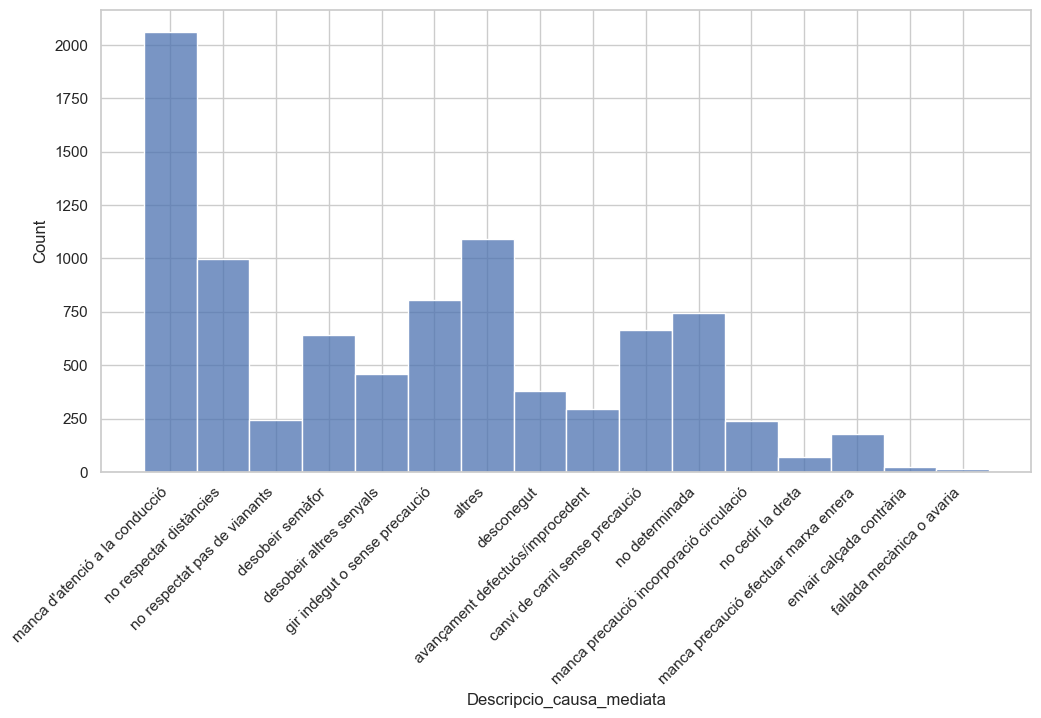

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the figure size
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['Descripcio_causa_mediata'])

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.show()


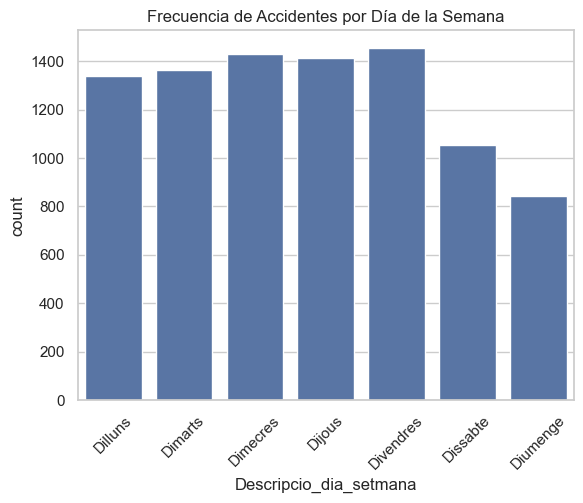

In [75]:
# Visualizar la frecuencia de accidentes por día de la semana
sns.countplot(x='Descripcio_dia_setmana', data=data, order=[
    "Dilluns", "Dimarts", "Dimecres", "Dijous", "Divendres", "Dissabte", "Diumenge"])
plt.title("Frecuencia de Accidentes por Día de la Semana")
plt.xticks(rotation=45)
plt.show()

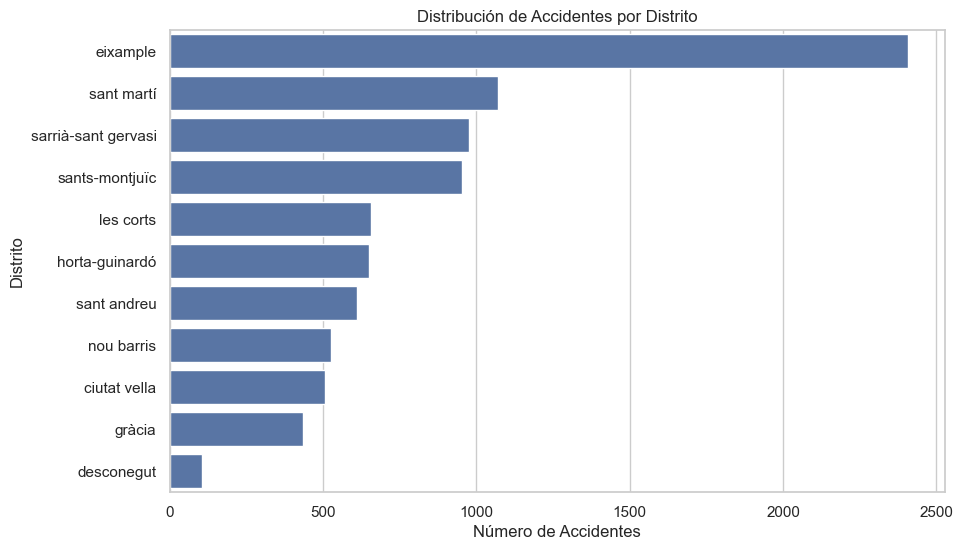

In [76]:
# Visualizar la distribución de accidentes por distrito
plt.figure(figsize=(10, 6))
sns.countplot(y='Nom_districte', data=data, order=data['Nom_districte'].value_counts().index)
plt.title("Distribución de Accidentes por Distrito")
plt.xlabel("Número de Accidentes")
plt.ylabel("Distrito")
plt.show()

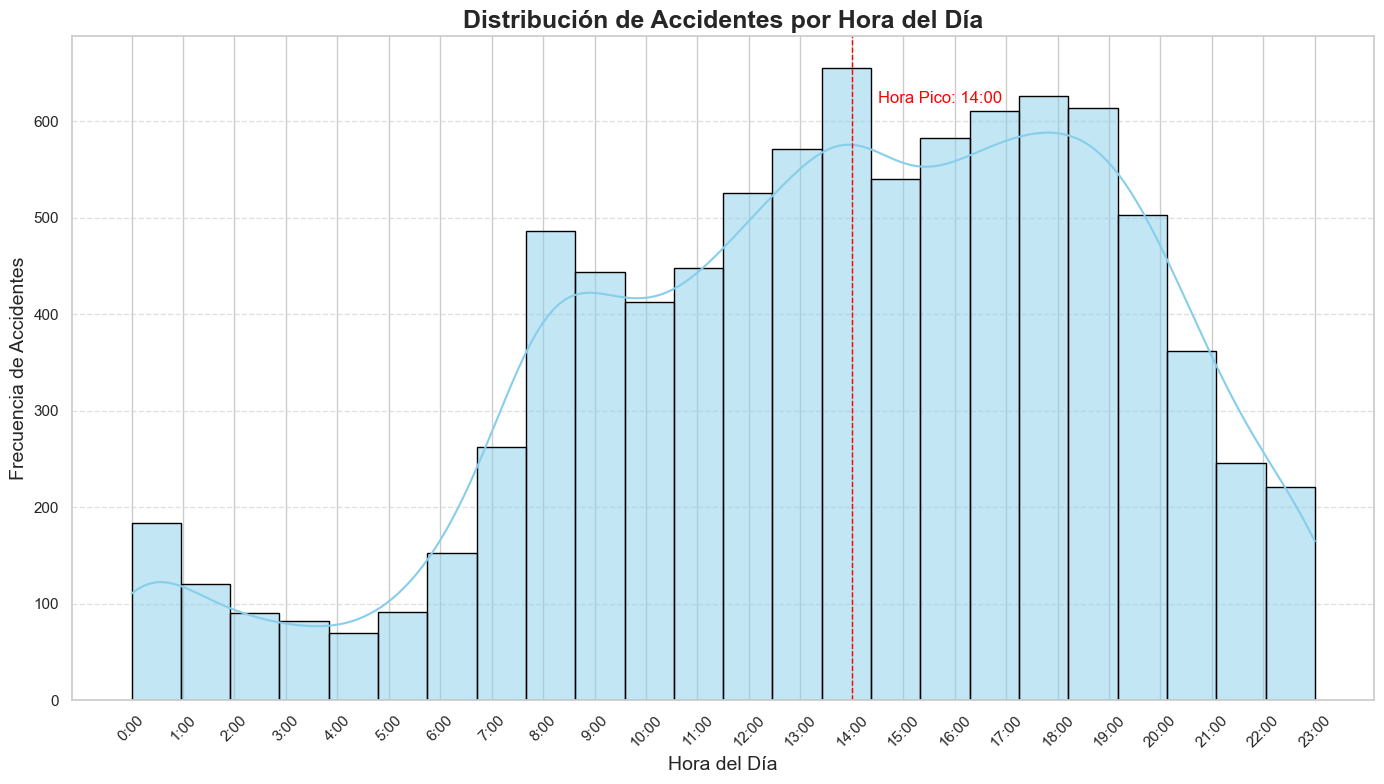

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convertir la columna Hora_dia a tipo numérico si es necesario
data['Hora_dia'] = pd.to_numeric(data['Hora_dia'], errors='coerce')

# Crear una figura más grande y profesional
plt.figure(figsize=(14, 8))

# Graficar la distribución de accidentes por hora del día con KDE (Kernel Density Estimate)
sns.histplot(data['Hora_dia'], bins=24, kde=True, color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title("Distribución de Accidentes por Hora del Día", fontsize=18, fontweight='bold')
plt.xlabel("Hora del Día", fontsize=14)
plt.ylabel("Frecuencia de Accidentes", fontsize=14)
plt.xticks(range(0, 24), labels=[f'{i}:00' for i in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Añadir anotaciones para las horas pico (si es necesario)
peak_hour = data['Hora_dia'].mode()[0]
plt.axvline(peak_hour, color='red', linestyle='--', linewidth=1)
plt.text(peak_hour + 0.5, plt.ylim()[1] * 0.9, f'Hora Pico: {peak_hour}:00', color='red', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


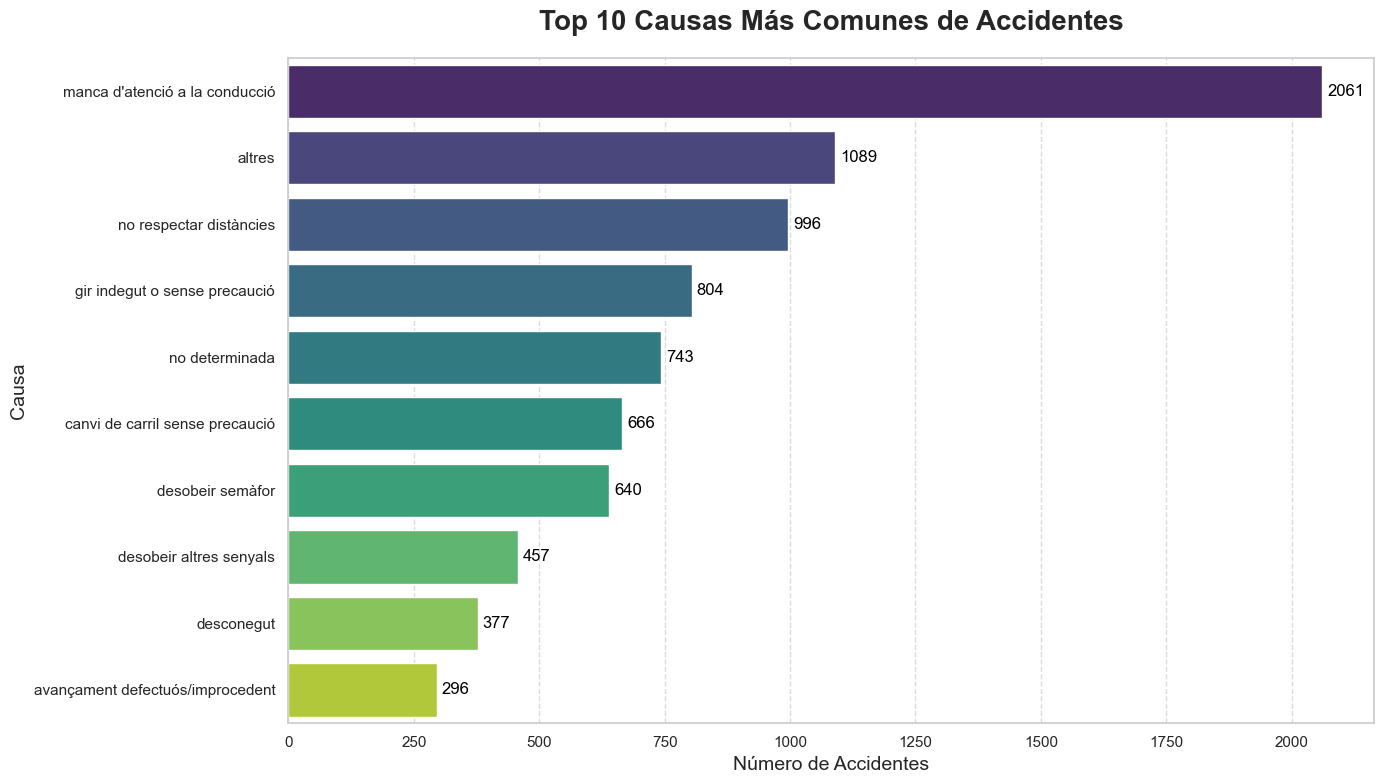

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ordenar las causas por frecuencia
top_causes = data['Descripcio_causa_mediata'].value_counts().head(10)

# Crear una figura más grande y profesional
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Graficar las 10 causas más comunes de accidentes con un gráfico de barras horizontal
bar_plot = sns.barplot(
    y=top_causes.index,
    x=top_causes.values,
    hue=top_causes.index,  # Usar 'hue' para que acepte 'palette'
    palette='viridis',
    dodge=False,
    legend=False
)

# Personalizar el gráfico
plt.title("Top 10 Causas Más Comunes de Accidentes", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Número de Accidentes", fontsize=14)
plt.ylabel("Causa", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas en cada barra con el número de accidentes
for i, count in enumerate(top_causes.values):
    bar_plot.text(count + 10, i, f'{count}', color='black', va='center', fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()


In [79]:
import pandas as pd

# Ordenar las calles por número de accidentes
top_streets = data['Nom_carrer'].value_counts().head(10)
print("Calles con más accidentes:")
print(top_streets)


Calles con más accidentes:
Nom_carrer
Corts Catalanes        426
Diagonal               384
Aragó                  249
Dalt (Besòs)           223
Litoral (Llobregat)    192
Meridiana              164
València               160
Gràcia                 155
Dalt (Llobregat)       154
Litoral (Besòs)        115
Name: count, dtype: int64


In [80]:
# Filtrar los datos para las calles con más accidentes
filtered_data = data[data['Nom_carrer'].isin(top_streets.index)]

# Agrupar por calle, hora y causa para obtener el número de accidentes
street_hour_cause = filtered_data.groupby(['Nom_carrer', 'Hora_dia', 'Descripcio_causa_mediata']).size().reset_index(name='Accidentes')

# Ordenar por el número de accidentes
street_hour_cause = street_hour_cause.sort_values(by='Accidentes', ascending=False)

# Mostrar las 10 combinaciones más frecuentes de calle, hora y causa
print("Top 10 combinaciones de calle, hora y causa:")
print(street_hour_cause.head(10))


Top 10 combinaciones de calle, hora y causa:
              Nom_carrer  Hora_dia         Descripcio_causa_mediata  \
342         Dalt (Besòs)        13          no respectar distàncies   
254      Corts Catalanes        18   manca d'atenció a la conducció   
597             Diagonal        18   manca d'atenció a la conducció   
236      Corts Catalanes        16          no respectar distàncies   
243      Corts Catalanes        17   manca d'atenció a la conducció   
349         Dalt (Besòs)        14          no respectar distàncies   
608             Diagonal        19   manca d'atenció a la conducció   
431     Dalt (Llobregat)        13          no respectar distàncies   
843  Litoral (Llobregat)         8  canvi de carril sense precaució   
256      Corts Catalanes        18          no respectar distàncies   

     Accidentes  
342          13  
254          10  
597          10  
236          10  
243           9  
349           9  
608           9  
431           8  
843        

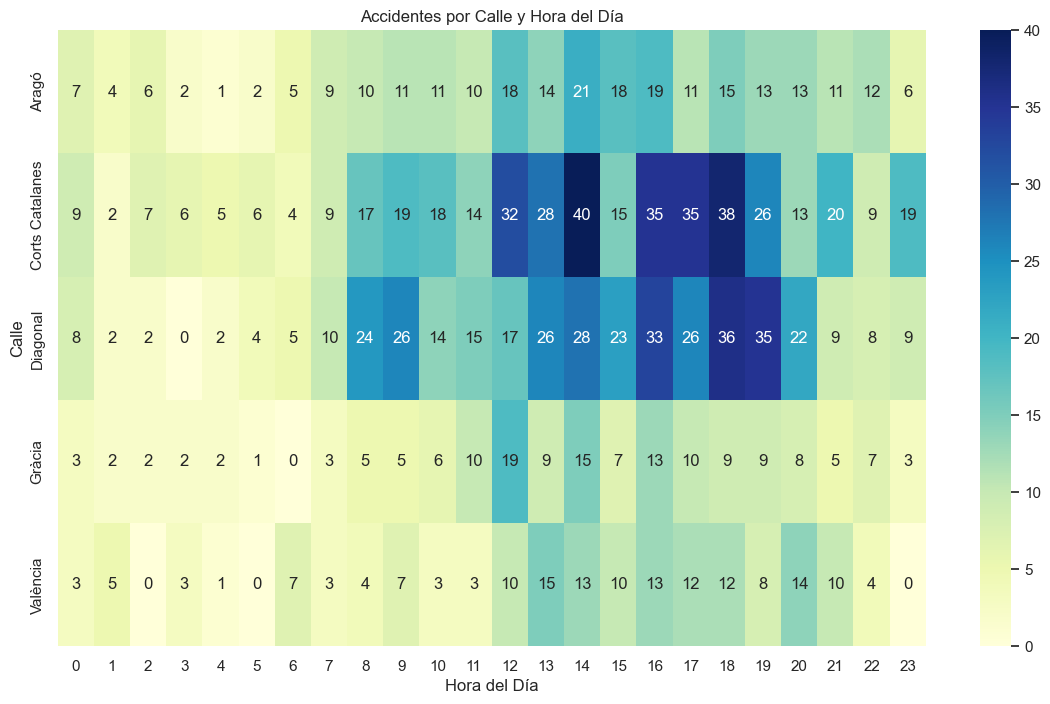

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico para visualizar las calles con más accidentes por hora y causa
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Seleccionar las 5 calles más peligrosas para graficar
top_5_streets = street_hour_cause['Nom_carrer'].value_counts().head(5).index
filtered_plot_data = street_hour_cause[street_hour_cause['Nom_carrer'].isin(top_5_streets)]

# Crear un gráfico de calor para visualizar la frecuencia de accidentes por hora
heatmap_data = filtered_plot_data.pivot_table(index='Nom_carrer', columns='Hora_dia', values='Accidentes', aggfunc='sum', fill_value=0)
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')

plt.title("Accidentes por Calle y Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Calle")
plt.show()


In [82]:
import folium
from folium.plugins import HeatMap, Fullscreen
import pandas as pd
import os

# Asegúrate de que los datos no tengan valores nulos en las columnas clave
data_filtered = data.dropna(subset=['Latitud_WGS84', 'Longitud_WGS84'])

# Realizar un muestreo aleatorio para reducir el número de puntos y acelerar la carga (tomar el 10% de los datos)
sampled_data = data_filtered.sample(frac=0.1, random_state=42)

# Crear un mapa centrado en las coordenadas medias de la ciudad
mapa = folium.Map(
    location=[sampled_data['Latitud_WGS84'].mean(), sampled_data['Longitud_WGS84'].mean()],
    zoom_start=12,
    control_scale=True
)

# Convertir las coordenadas a una lista para el mapa de calor
heat_data = sampled_data[['Latitud_WGS84', 'Longitud_WGS84']].values.tolist()

# Añadir un mapa de calor optimizado con menos puntos y ajustes de radio y desenfoque
HeatMap(
    heat_data,
    min_opacity=0.4,
    max_opacity=0.8,
    radius=10,
    blur=12,
    max_zoom=1
).add_to(mapa)

# Añadir un botón para pantalla completa
Fullscreen().add_to(mapa)

# Definir la ruta de salida
output_path = "outputs/visualizations/mapa_calor_accidentes_rapido.html"

# Crear el directorio si no existe
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Guardar el mapa como un archivo HTML interactivo
mapa.save(output_path)
print(f"Mapa de calor rápido guardado en: {output_path}")

# Mostrar el mapa en el notebook
mapa



Mapa de calor rápido guardado en: outputs/visualizations/mapa_calor_accidentes_rapido.html


In [88]:
# Filtrar los datos para el distrito "Eixample"
eixample_data = data[data['Nom_districte'] == 'eixample']

# Verificar el número total de accidentes en el distrito "Eixample"
total_accidentes = len(eixample_data)
print(f"Total de accidentes en el distrito Eixample: {total_accidentes}")


Total de accidentes en el distrito Eixample: 2407


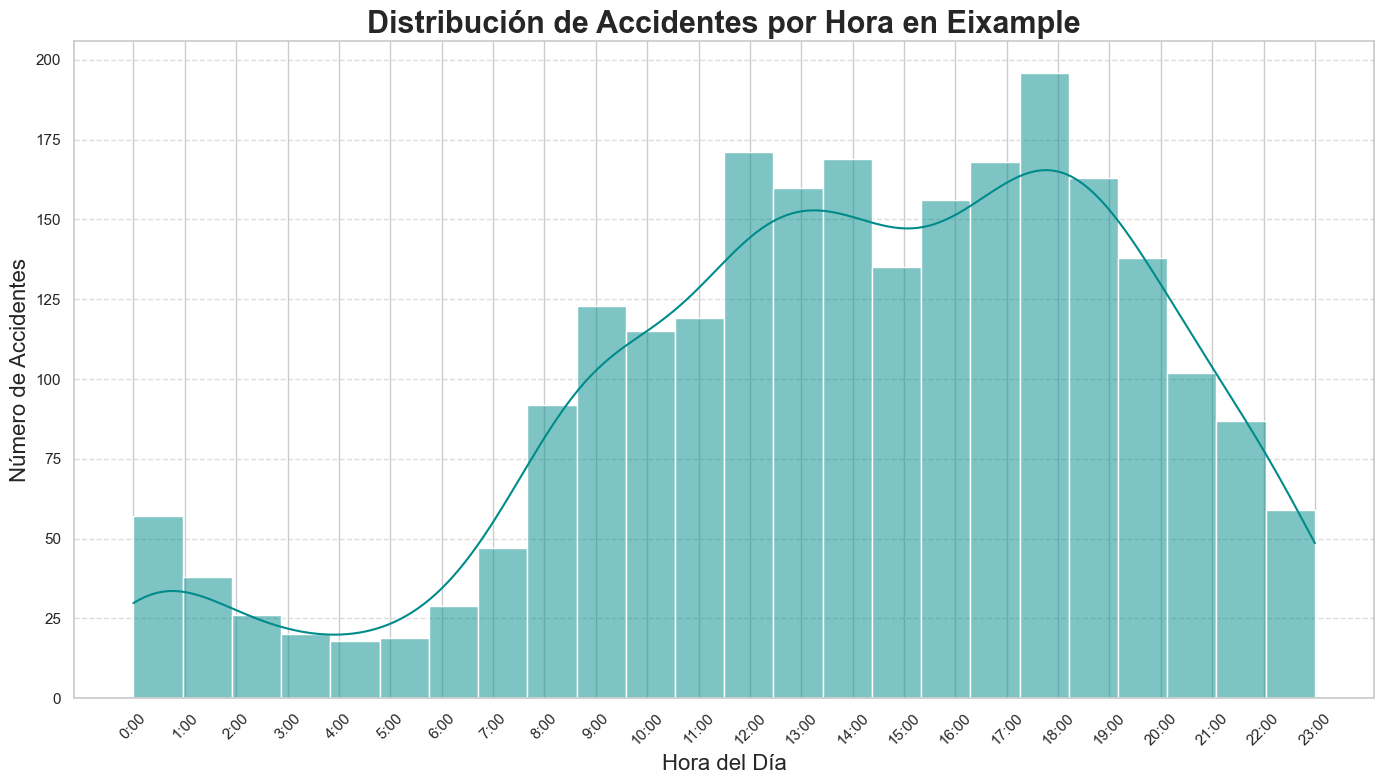

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tema para gráficos profesionales
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.histplot(eixample_data['Hora_dia'], bins=24, kde=True, color='darkcyan')
plt.title("Distribución de Accidentes por Hora en Eixample", fontsize=22, fontweight='bold')
plt.xlabel("Hora del Día", fontsize=16)
plt.ylabel("Número de Accidentes", fontsize=16)
plt.xticks(range(0, 24), [f"{i}:00" for i in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



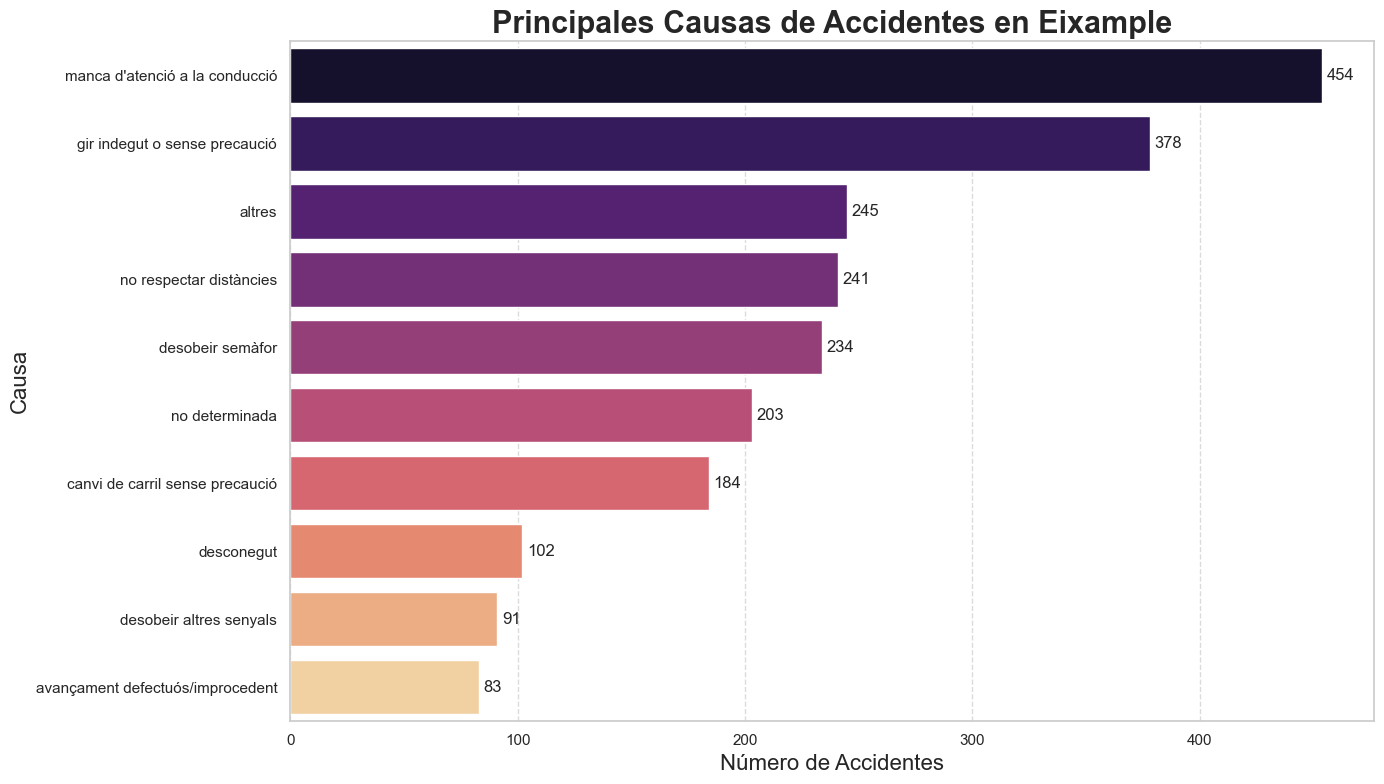

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tema para gráficos profesionales
sns.set_theme(style="whitegrid")

# Contar las principales causas de accidentes
top_causes = eixample_data['Descripcio_causa_mediata'].value_counts().head(10)

plt.figure(figsize=(14, 8))

# Crear un gráfico de barras horizontal con corrección para la advertencia de Seaborn
sns.barplot(
    y=top_causes.index,
    x=top_causes.values,
    hue=top_causes.index,  # Asignar `hue` para que `palette` funcione
    palette='magma',
    dodge=False,
    legend=False
)

# Añadir etiquetas a cada barra con el número de accidentes
for i, value in enumerate(top_causes.values):
    plt.text(value + 2, i, str(value), va='center', fontsize=12)

# Personalizar el gráfico
plt.title("Principales Causas de Accidentes en Eixample", fontsize=22, fontweight='bold')
plt.xlabel("Número de Accidentes", fontsize=16)
plt.ylabel("Causa", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


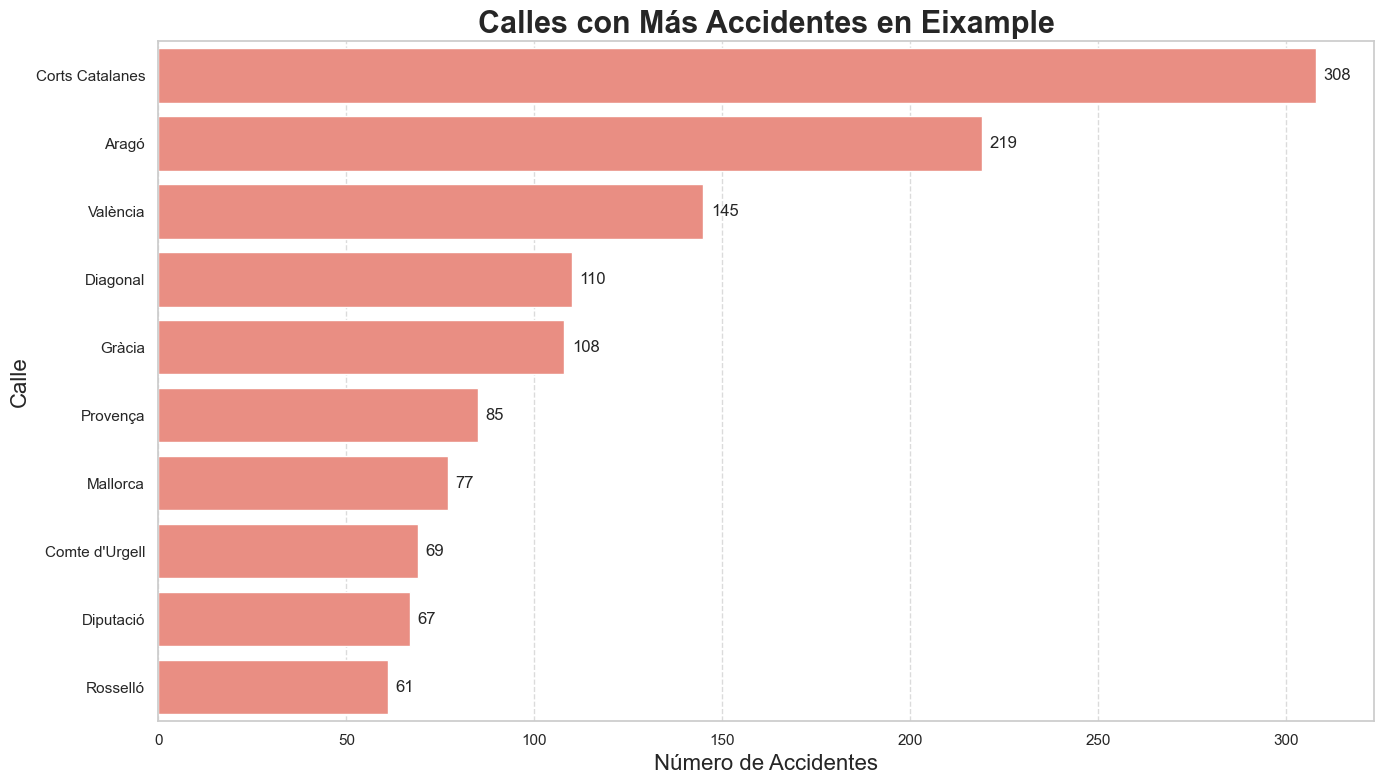

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tema para gráficos profesionales
sns.set_theme(style="whitegrid")

# Calles con más accidentes en el distrito Eixample
top_streets = eixample_data['Nom_carrer'].value_counts().head(10)

plt.figure(figsize=(14, 8))

# Crear un gráfico de barras usando `color`
sns.barplot(
    y=top_streets.index,
    x=top_streets.values,
    color='salmon'
)

# Añadir etiquetas a cada barra con el número de accidentes
for i, value in enumerate(top_streets.values):
    plt.text(value + 2, i, str(value), va='center', fontsize=12)

# Personalizar el gráfico
plt.title("Calles con Más Accidentes en Eixample", fontsize=22, fontweight='bold')
plt.xlabel("Número de Accidentes", fontsize=16)
plt.ylabel("Calle", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [92]:
import folium
from folium.plugins import HeatMap

# Crear un mapa centrado en el distrito Eixample
map_eixample = folium.Map(location=[eixample_data['Latitud_WGS84'].mean(), eixample_data['Longitud_WGS84'].mean()], zoom_start=14)

# Convertir las coordenadas en una lista de puntos para el mapa de calor
coordenadas = eixample_data[['Latitud_WGS84', 'Longitud_WGS84']].dropna().values.tolist()
HeatMap(coordenadas, min_opacity=0.5, radius=10, blur=15, max_zoom=1).add_to(map_eixample)

# Guardar el mapa como archivo HTML
map_eixample.save("outputs/visualizations/mapa_calor_eixample.html")
print("Mapa de calor guardado en: outputs/visualizations/mapa_calor_eixample.html")

# Mostrar el mapa en el notebook
map_eixample


Mapa de calor guardado en: outputs/visualizations/mapa_calor_eixample.html
